# Computer Vision Assignment 1 Part 2
---

Semester: **Fall 2023**

Due date: **October 5th 2023, 11.59PM EST.**

## Introduction
---
This assignment requires you to participate in a Kaggle competition with the rest of the class on the [German Traffic Sign Recognition Benchmark](http://benchmark.ini.rub.de/?section=gtsrb). The objective is to produce a model that gives the highest possible accuracy on the test portion of this dataset. You can register for the competition using the [private link](https://www.kaggle.com/t/f198351e92ff46d5a839fd73d22e9cbc).

Skeleton code is provided in the colab below. This contains code for training a simple default model and evaluating it on the test set. The evaluation script produces a file `gtsrb_kaggle.csv` that lists the IDs of the test set images, along with their predicted label. This file should be uploaded to the Kaggle webpage, which will then produce a test accuracy score.

Your goal is to implement a new model architecture that improves upon the baseline performance. You are free to implement any approach covered in class or from research papers. This part will count for 50% of the overall grade for assignment 1. This Grading will depend on your Kaggle performance and rank, as well as novelty of the architecture.  

## Rules
---
You should make a copy of this Colab (`File->Save a copy in Drive`). Please start the assignment early and don’t be afraid to ask for help from either the TAs or myself. You are allowed to collaborate with other students in terms discussing ideas and possible solutions. However you code up the solution yourself, i.e. you must write your own code. Copying your friends code and just changing all the names of the variables is NOT ALLOWED! You are not allowed to use solutions from similar assignments in courses from other institutions, or those found elsewhere on the web.

Your solutions should be submitted via the Brightspace system. This should include a brief description (in the Colab) explaining the model architectures you explored, citing any relevant papers or techniques that you used. You should also include convergence plots of training accuracy vs epoch for relevant models.

## Important Details
---
• You are only allowed 8 submissions to the Kaggle evaluation server per day. This is to prevent over-fitting on the test dataset. So be sure to start the assignment early!

• You are NOT ALLOWED to use the test set labels during training in any way. Doing so will be regarded as cheating and penalized accordingly.

• The evaluation metric is accuracy, i.e. the fraction of test set examples where the predicted label agrees with the ground truth label.

• You should be able to achieve a test accuracy of at least 95%

• **Extra important:** Please use your NYU NetID as your team name on Kaggle, so the TAs can figure out which user you are on the leaderboard.

# Dataset Preparation
___

1.  Download [`dataset.zip`](https://cs.nyu.edu/~fergus/teaching/vision/dataset.zip) from the course website to your local machine.
2.  Unzip the file. You should see a `dataset` directory with three subfolders: `training`, `validation`, and `testing`.
3.  Go to Google Drive (on your NYU account) and make a new directory (say `cv_kaggle_assignment`).
4.  Upload each of the three subfolders to it.
5.  Run the code block below. It will ask for permission to mount your Google Drive (NYU account) so this colab can access it. Paste the authorization code into the box as requested.


In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd  /content/drive/'MyDrive'/'CV 23'/cv_kaggle_assignment1/

Mounted at /content/drive
/content/drive/MyDrive/CV 23/cv_kaggle_assignment1


# Imports

In [2]:
import torch
from torch.utils.data import Dataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision

# Hyper Parameters

In [3]:
# Default Parameters
# batch_size = 32
# momentum = 0.9
# lr = 0.01
# epochs = 5
# log_interval = 100


batch_size = 32
momentum = 0.9
lr = 0.005
epochs = 30
log_interval = 100

# Dataloader

In [4]:
class MyDataset(Dataset):

    def __init__(self, X_path="X.pt", y_path="y.pt"):

        self.X = torch.load(X_path).squeeze(1)
        self.y = torch.load(y_path).squeeze(1)

    def __len__(self):
        return self.X.size(0)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = MyDataset(X_path="train/X.pt", y_path="train/y.pt")
val_dataset = MyDataset(X_path="validation/X.pt", y_path="validation/y.pt")

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=1)

val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=True, num_workers=1)

# Model

### Model Architectures & Approach
**Model 1:** Adding more Conv2D layers to the given baseline network so that it's able to extract more feature maps-> Trained for 25 epochs and got a test accuracy of about 96.595%
<br>
<br>
**Model 2:**
AlexNet type Architecture with 5 Conv2d layers and 3 FC layers.Used Batch Normalization & Droppout for regularization.Worked with different hyperparameters(learning rate and weight decay) When Adam Optimizer and cross entropy loss was used- the loss got stuck and validation accuracy was only ~90% and the test accuracy was 89.105%
<br>
<br>
**Model 3**: <br>
Since AlexNet was initially used on images of bigger size & Model 1 with just 3 layers was performing better, I reduced the number of Conv2D layers in Model2 back to 3 layers.<br>
Fine-tuned the hyper-parameters and used weight initialization-<br>
Kaiming He gave better results than Xavier weight initialization.<br>
Tried LR= 0.005, 0.01 and 0.001. LR=0.001 gave best results.<br>
Tried both Adam and AdamW optimizer -> similar results.<br>
Adding Batch Norm and a lr scheduler helped increase accuracy on validation set.<br>
Tried StepLR and ExonentialLR--> StepLR gave slightly better results on validation set.<br>
Batch size tried = 32,64,128 <br>
With batch size 32, this model quickly converged and gave me the best score of 97.181 % on test set.<br>



##### Architecture 1 - (given)


In [5]:

# nclasses = 43 # GTSRB has 43 classes

# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(3, 10, kernel_size=5)
#         self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
#         self.conv2_drop = nn.Dropout2d()
#         self.fc1 = nn.Linear(500, 50)
#         self.fc2 = nn.Linear(50, nclasses)


#     def forward(self, x):

#         x = F.relu(F.max_pool2d(self.conv1(x), 2))
#         x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
#         x = x.view(-1, 500)
#         x = F.relu(self.fc1(x))
#         x = F.dropout(x, training=self.training)
#         x = self.fc2(x)
#         return F.log_softmax(x,dim=1)


##### Model 1

In [6]:
# nclasses = 43 # GTSRB has 43 classes
# class Net(nn.Module):
#    def __init__(self):
#        super(Net, self).__init__()
#        self.conv1 = nn.Conv2d(3, 100, kernel_size=3)
#        self.conv2 = nn.Conv2d(100, 150, kernel_size=4)
#        self.conv2_drop = nn.Dropout2d()
#        self.conv3 = nn.Conv2d(150, 250, kernel_size=3)
#        self.conv3_drop = nn.Dropout2d()
#        self.fc1 = nn.Linear(1000, 200)
#        self.fc2 = nn.Linear(200, nclasses)

#    def forward(self, x):
#        x = F.relu(F.max_pool2d(self.conv1(x), 2))
#        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
#        x = F.relu(F.max_pool2d(self.conv3_drop(self.conv3(x)), 2))
#        x = x.view(-1, 250*4)
#        x = F.relu(self.fc1(x))
#        x = F.dropout(x, training=self.training)
#        x = self.fc2(x)
#        return F.log_softmax(x)

###### Model 2- AlexNet inspired architecture

In [7]:
# AlexNet inpsired architecture
# nclasses = 43 # GTSRB has 43 classes
# class Net(nn.Module):
#    def __init__(self):
#        super(Net, self).__init__()
#        self.layer1=nn.Sequential(nn.Conv2d(3, 96, kernel_size=5),
#                                  nn.ReLU(),
#                                  nn.MaxPool2d(2))  # 96 x 14 x 14
#        self.layer2=nn.Sequential(nn.Conv2d(96,256, kernel_size=5,padding=2),
#                                  nn.ReLU(),
#                                  nn.MaxPool2d(2))

#        self.layer3=nn.Sequential(nn.Conv2d(256,512,kernel_size=5,padding=2),
#                                  nn.ReLU())
#        self.layer4=nn.Sequential(nn.Conv2d(512,512,kernel_size=5,padding=2),
#                                  nn.ReLU())
#        self.layer5=nn.Sequential(nn.Conv2d(512,256,kernel_size=5,padding=2),
#                                  nn.ReLU(),
#                                  nn.MaxPool2d(2))
#        self.fc1=nn.Sequential(nn.Flatten(),nn.Linear(256*3*3,1024),nn.ReLU(),nn.Dropout(0.5))
#        self.fc2=nn.Sequential(nn.Linear(1024,200),nn.ReLU(),nn.Dropout(0.5))
#        self.fc3=nn.Linear(200,nclasses)
#        #self.sm=F.log_softmax()


#    def forward(self, x):
#        x = self.layer1(x)
#        x = self.layer2(x)
#        x = self.layer3(x)
#        x = self.layer4(x)
#        x = self.layer5(x)
#        x = self.fc1(x)
#        x = self.fc2(x)
#        x = self.fc3(x)
#        #x = F.log_softmax(x)
#        return x

###### Model 3- Reduce no of conv layers in Model 2 + use regularization + weight initialization

In [8]:
nclasses = 43 # GTSRB has 43 classes
class Net(nn.Module):
   def __init__(self):
       super(Net, self).__init__()
       self.layer1=nn.Sequential(nn.Conv2d(3, 32, kernel_size=5,padding=2),
                                 nn.BatchNorm2d(32),
                                 nn.ReLU(),
                                 nn.MaxPool2d(kernel_size=3,stride=1))
                                #nn.Dropout2d())  # 32 x 30 x 30
       self.layer2=nn.Sequential(nn.Conv2d(32,64 ,kernel_size=5,padding=2),
                                 nn.BatchNorm2d(64),
                                 nn.ReLU(),
                                 nn.MaxPool2d(2),
                                nn.Dropout2d())  # 64 x 15 x 15
       self.layer3=nn.Sequential(nn.Conv2d(64,256 ,kernel_size=5,padding=2),
                                 nn.BatchNorm2d(256),
                                 nn.ReLU(),
                                 nn.MaxPool2d(2),
                                 nn.Dropout2d())  #128 x 7 x 7
       self.fc1=nn.Sequential(nn.Flatten(),nn.Linear(256*7*7,1024),nn.BatchNorm1d(1024),nn.ReLU())
       self.fc2=nn.Sequential(nn.Linear(1024,256),nn.BatchNorm1d(256),nn.ReLU())
       self.fc3=nn.Linear(256,nclasses)
       self._initialize_weights()


   def forward(self, x):
       x = self.layer1(x)
       x = self.layer2(x)
       x = self.layer3(x)
       x = F.dropout(self.fc1(x),training=self.training)
       x = F.dropout(self.fc2(x),training=self.training)
       x = self.fc3(x)
       x = F.log_softmax(x)
       return x
  # Kaiming He  weight Initialization
   def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu',a=0)


# Training

In [9]:
from torch.optim import lr_scheduler
model = Net()
train_loss=[]
val_loss=[]
#optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
optimizer=torch.optim.AdamW(model.parameters(),lr=0.001,weight_decay=0.1)
scheduler = lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.9,last_epoch=-1)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data,target=data.to(device),target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    scheduler.step()
    train_loss.append(loss.item())


def validation():
    model.eval()
    validation_loss = 0
    correct = 0
    for data, target in val_loader:
        data,target=data.to(device),target.to(device)
        output = model(data)
        validation_loss += F.nll_loss(output, target, reduction="sum").item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    validation_loss /= len(val_loader.dataset)
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        validation_loss, correct, len(val_loader.dataset),
        100. * correct / len(val_loader.dataset)))
    val_loss.append(validation_loss)


for epoch in range(1, epochs + 1):
    train(epoch)
    validation()
    model_file = 'model_' + str(epoch) + '.pth'
    torch.save(model.state_dict(), model_file)
    print('\nSaved model to ' + model_file + '.')



<ipython-input-8-00b71a253b16>:33: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)


Train Epoch: 1 [0/35339 (0%)]	Loss: 4.758301
Train Epoch: 1 [3200/35339 (9%)]	Loss: 3.192168
Train Epoch: 1 [6400/35339 (18%)]	Loss: 2.340460
Train Epoch: 1 [9600/35339 (27%)]	Loss: 2.577085
Train Epoch: 1 [12800/35339 (36%)]	Loss: 1.537540
Train Epoch: 1 [16000/35339 (45%)]	Loss: 1.781585
Train Epoch: 1 [19200/35339 (54%)]	Loss: 1.412336
Train Epoch: 1 [22400/35339 (63%)]	Loss: 1.025217
Train Epoch: 1 [25600/35339 (72%)]	Loss: 1.039708
Train Epoch: 1 [28800/35339 (81%)]	Loss: 0.640880
Train Epoch: 1 [32000/35339 (90%)]	Loss: 0.555283
Train Epoch: 1 [35200/35339 (100%)]	Loss: 0.559097

Validation set: Average loss: 0.9499, Accuracy: 2695/3870 (70%)


Saved model to model_1.pth.
Train Epoch: 2 [0/35339 (0%)]	Loss: 0.484561
Train Epoch: 2 [3200/35339 (9%)]	Loss: 0.539591
Train Epoch: 2 [6400/35339 (18%)]	Loss: 0.792170
Train Epoch: 2 [9600/35339 (27%)]	Loss: 0.365878
Train Epoch: 2 [12800/35339 (36%)]	Loss: 0.269265
Train Epoch: 2 [16000/35339 (45%)]	Loss: 0.398952
Train Epoch: 2 [19200/

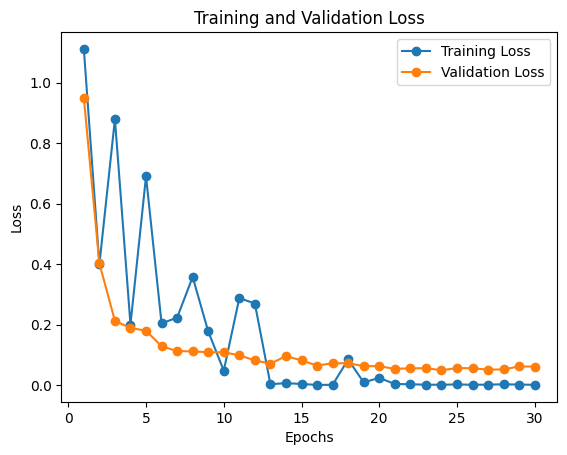

In [10]:
import matplotlib.pyplot as plt
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate and Submit to Kaggle

In [11]:
import pickle
import pandas as pd

outfile = 'gtsrb_kaggle.csv'
#model.load_state_dict(torch.load('model_20.pth'))

output_file = open(outfile, "w")
dataframe_dict = {"Filename" : [], "ClassId": []}

test_data = torch.load('testing/test.pt')
file_ids = pickle.load(open('testing/file_ids.pkl', 'rb'))
model.eval() # Don't forget to put your model on eval mode !

for i, data in enumerate(test_data):
    data=data.to(device)
    data = data.unsqueeze(0)

    output = model(data)
    pred = output.data.max(1, keepdim=True)[1].item()
    file_id = file_ids[i][0:5]
    dataframe_dict['Filename'].append(file_id)
    dataframe_dict['ClassId'].append(pred)

df = pd.DataFrame(data=dataframe_dict)
df.to_csv(outfile, index=False)
print("Written to csv file {}".format(outfile))

<ipython-input-8-00b71a253b16>:33: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)


Written to csv file gtsrb_kaggle.csv


# Submitting to Kaggle

Now download the CSV file `grtsrb_kaggle.csv` from your Google drive and then submit it to Kaggle to check the performance of your model.

**Extra important:** Please use your NYU NetID as your team name on Kaggle, or your submissions will not be evaluated.  
You can rename your team easily from the Team tab: https://www.kaggle.com/competitions/nyu-computer-vision-csci-ga2271-2022/team.